### 6.4 Machine Learning Part 1

#### This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# establishing a path

path = '/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Immersion/Achievement 6/World Happiness Report'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2015 - 2019 Cleaned.pkl'))

#### 2. Data Cleaning

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [5]:
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,139651.0,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,130232.0,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,132548.0,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1459.0,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,132629.0,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,129025.0,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,132944.0,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,8,7.364,133171.0,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,125018.0,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,133358.0,0.93156,0.65124,0.35637,0.43562,2015


In [6]:
df.shape

(782, 10)

Missing Values

In [7]:
# Check for missing values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [8]:
# No missing values

In [9]:
dups = df.duplicated()

In [10]:
dups.shape

(782,)

In [11]:
# No dups

Extreme values checks

/var/folders/bm/wxz2f90s7x104nl7tfs2lwdw0000gn/T/ipykernel_24667/3058776609.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Health (Life Expectancy)'], bins=25)


<Axes: xlabel='Health (Life Expectancy)', ylabel='Density'>

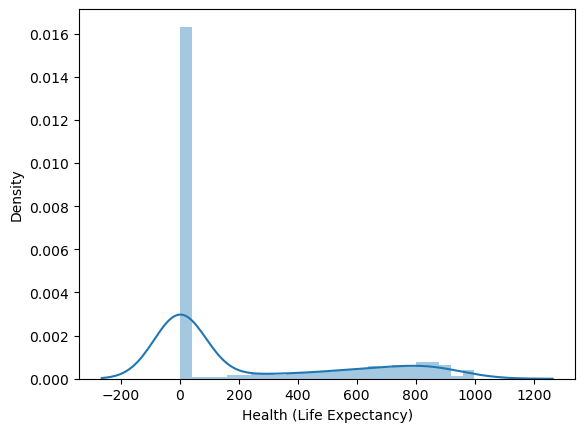

In [12]:
# Shows extreme values

sns.distplot(df['Health (Life Expectancy)'], bins=25)

In [13]:
# Check the mean 

df['Health (Life Expectancy)'].mean()

223.87486314744874

In [14]:
# check the median 

df['Health (Life Expectancy)'].median()

0.7996203658771515

In [15]:
# check the max

df['Health (Life Expectancy)'].max()

999.0

#### Hypothesis: There is a significant linear relationship between Health (Life Expectancy) and Happiness Score, such that as Health (Life Expectancy) increases, Happiness Score increases.

#### 3. Data prep for regression analysis

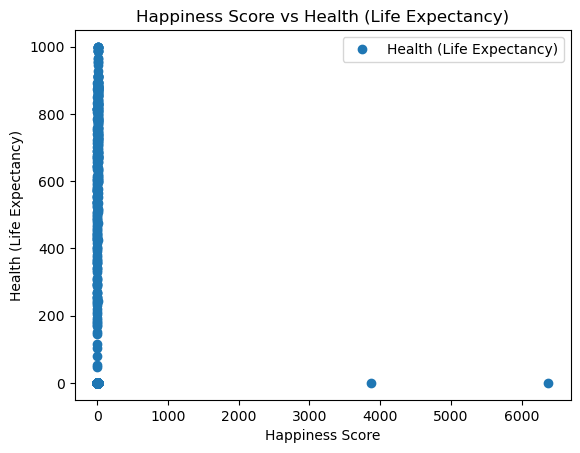

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness Score', y='Health (Life Expectancy)',style='o') 
plt.title('Happiness Score vs Health (Life Expectancy)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Health (Life Expectancy)')  
plt.show()

#### Removing the outliers

In [17]:
 print(df['Happiness Score'].describe())
 print(df['Health (Life Expectancy)'].describe())

count     782.000000
mean       18.473327
std       266.366804
min         2.693000
25%         4.512250
50%         5.323500
75%         6.192000
max      6375.000000
Name: Happiness Score, dtype: float64
count    782.000000
mean     223.874863
std      334.681783
min        0.000000
25%        0.574271
50%        0.799620
75%      520.750000
max      999.000000
Name: Health (Life Expectancy), dtype: float64


In [18]:
df_clean = df[(df['Health (Life Expectancy)'] > 100) & (df['Happiness Score'] < 8000)]

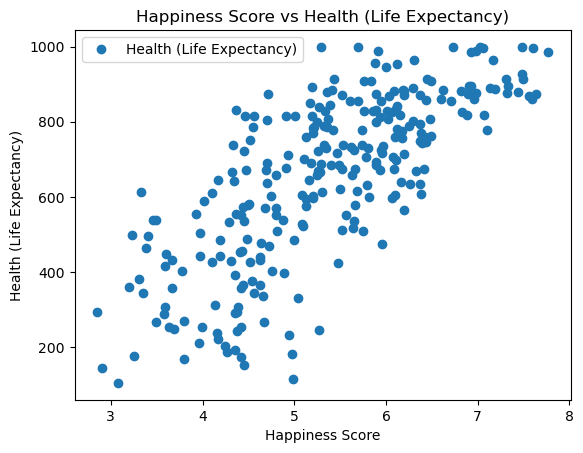

In [19]:
df_clean.plot(x = 'Happiness Score', y='Health (Life Expectancy)',style='o') 
plt.title('Happiness Score vs Health (Life Expectancy)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Health (Life Expectancy)')  
plt.show()

This scatter plot shows a clearer, positive relationship between Happiness Score and Health (Life Expectancy). The real data shows an upward trend, indicating that countries with higher life expectancy tend to report higher happiness levels. However, data are dispersed, there are regions clustered towards the higher end and significant vertical spread at lower happiness levels. For data points with a similar X value, there's no way to predict other point using the linear regression. This shows that while it explains linear relationships, the relationship might not have significant predictibility, but a general upward one with various degrees.

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean['Happiness Score'].values.reshape(-1,1)
y = df_clean['Health (Life Expectancy)'].values.reshape(-1,1)

In [21]:
X

array([[7.104],
       [6.068],
       [4.272],
       [3.666],
       [7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [22]:
y

array([[779.],
       [596.],
       [188.],
       [357.],
       [874.],
       [861.],
       [868.],
       [914.],
       [927.],
       [878.],
       [896.],
       [876.],
       [913.],
       [888.],
       [891.],
       [817.],
       [876.],
       [861.],
       [894.],
       [896.],
       [819.],
       [883.],
       [854.],
       [884.],
       [908.],
       [761.],
       [808.],
       [857.],
       [759.],
       [675.],
       [744.],
       [608.],
       [771.],
       [748.],
       [633.],
       [669.],
       [965.],
       [635.],
       [564.],
       [776.],
       [639.],
       [781.],
       [698.],
       [605.],
       [675.],
       [707.],
       [946.],
       [736.],
       [474.],
       [716.],
       [856.],
       [726.],
       [671.],
       [988.],
       [684.],
       [693.],
       [955.],
       [909.],
       [599.],
       [631.],
       [909.],
       [508.],
       [737.],
       [615.],
       [674.],
       [578.],
       [51

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [24]:
# Create a regression object.

regression = LinearRegression() 

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

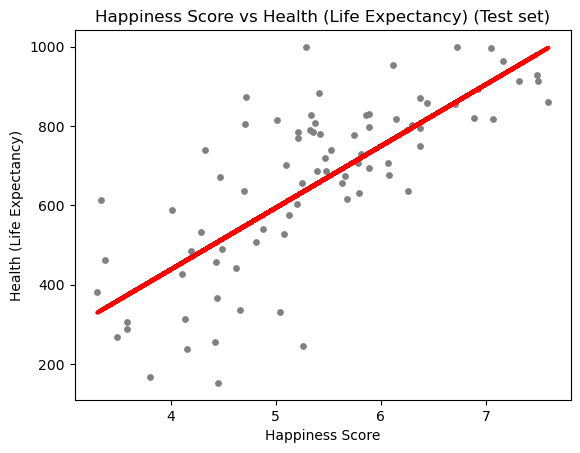

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Health (Life Expectancy) (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Health (Life Expectancy)')
plot_test.show()

The scatterplot illustrating Happiness Score versus Health (Life Expectancy) shows an upward-sloping regression line, indicating a positive relationship between the two variables. However, the scatter around the line is substantial, meaning Health (Life Expectancy) does not fully predict happiness. Thus, there is a general, but not perfectly reliable tendency and other values or approaches may be used to analyse this data

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error

r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[155.57725064]]
Mean squared error:  20217.91593770304
R2 score:  0.560599536471641


In [30]:
y_predicted

array([[454.24593728],
       [600.02182113],
       [656.96309486],
       [719.03841787],
       [731.32902067],
       [506.20873899],
       [708.77031932],
       [714.37110035],
       [915.53248543],
       [980.09704444],
       [372.56788069],
       [439.93283022],
       [507.14220249],
       [651.20673659],
       [912.73209491],
       [513.83202427],
       [626.00322198],
       [788.11471715],
       [612.62357843],
       [696.32413927],
       [726.97285765],
       [373.34576694],
       [731.64017517],
       [716.0824501 ],
       [665.83099815],
       [648.87307783],
       [549.45921467],
       [655.09616785],
       [631.60400301],
       [547.59228766],
       [981.34166245],
       [795.42684793],
       [659.29675362],
       [767.11178831],
       [759.95523478],
       [861.7027567 ],
       [624.44744948],
       [534.52379861],
       [817.36324027],
       [503.56392573],
       [643.42787406],
       [594.88777186],
       [789.20375791],
       [771

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

data.head(30)

,Actual,Predicted
0,426.0,454.245937
1,331.0,600.021821
2,884.0,656.963095
3,729.0,719.038418
4,798.0,731.329021
5,365.0,506.208739
6,777.0,708.770319
7,706.0,714.371100
8,817.0,915.532485
9,927.0,980.097044


Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[155.57725064]]
Mean squared error:  22494.32812163474
R2 score:  0.5598767587709281


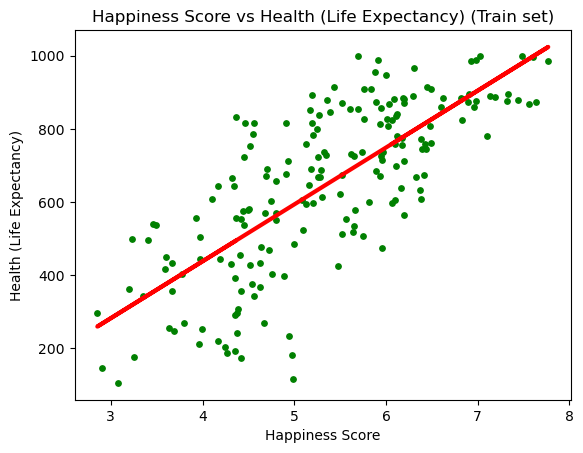

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness Score vs Health (Life Expectancy) (Train set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Health (Life Expectancy)')
plot_test.show()

The scatterplot depicting Happiness Score versus Health (Life Expectancy) on the training set reveals a generally positive relationship, as evidenced by the upward-sloping regression line; however, this relationship is not absolute. While higher life expectancy tends to correlate with higher happiness scores, there is significant deviation around the regression line, indicating other factors are also at play. These factors may include outliers that show there is no real data to sustain that conclusion. In conclusion, the need for cleaning this data may be required, as it is difficult to read due to it's complexity.